# Analyse de données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
weather = pd.read_csv('data/weatherHistory.csv')
weather["Formatted Date"] = pd.to_datetime(weather["Formatted Date"],format="%Y-%m-%d %H:%M:%S", utc = True)

#On enlève la column 'Loud Cover' pat manque de données
weather = weather.drop(['Loud Cover'], axis=1)

weather = weather[~(weather["Formatted Date"] < '2006-01-01')]

weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


Graphique categoriel des predictions en foction de la temperature

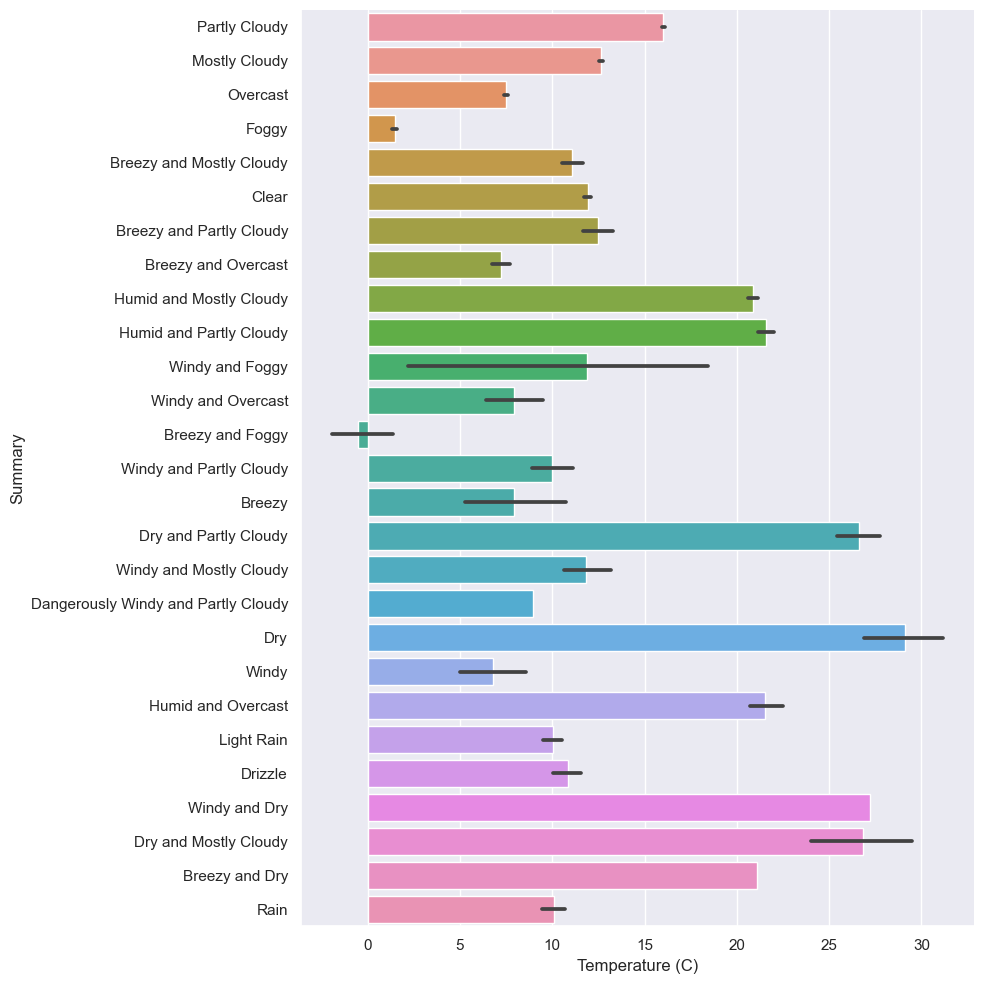

In [65]:
sns.catplot(
            data = weather,
            x="Temperature (C)",
            y="Summary",
            kind="bar",
            height = 10
        )

Le changement de la temperature moyenne en par an

In [66]:
weather.insert(1, "Day", pd.DatetimeIndex(weather["Formatted Date"]).day)
weather.insert(2, "Month", pd.DatetimeIndex(weather["Formatted Date"]).month)
weather.insert(3, "Year", pd.DatetimeIndex(weather["Formatted Date"]).year)

In [78]:
tempPerYear = pd.DataFrame(
    weather.groupby('Month')["Temperature (C)"].mean()); tempPerYear
#['Year','Month']

,Temperature (C)
Month,
1,0.815678
2,2.166880
3,6.914976
4,12.769200
5,16.874455
6,20.728510
7,22.965462
8,22.339134
9,17.503458


In [79]:
tempPerYear = pd.DataFrame(
    weather.groupby('Year')["Temperature (C)"].mean(),
    columns = tempPerYear.index,
)
tempPerYear
#['Year','Month']

Month,1,2,3,4,5,6,7,8,9,10,11,12


In [74]:
sns.set_theme(style="darkgrid")
sns.lineplot(
    x=tempPerYear.index,
    y=tempPerYear["Temperature (C)"],
    )
plt.title("Average temperature over the years")

AttributeError: 'MultiIndex' object has no attribute '_data'

In [45]:
df = weather.drop(['Formatted Date','Day','Month','Year'], axis=1)

array([[<AxesSubplot: title={'center': 'Temperature (C)'}>,
        <AxesSubplot: title={'center': 'Apparent Temperature (C)'}>,
        <AxesSubplot: title={'center': 'Humidity'}>],
       [<AxesSubplot: title={'center': 'Wind Speed (km/h)'}>,
        <AxesSubplot: title={'center': 'Wind Bearing (degrees)'}>,
        <AxesSubplot: title={'center': 'Visibility (km)'}>],
       [<AxesSubplot: title={'center': 'Pressure (millibars)'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

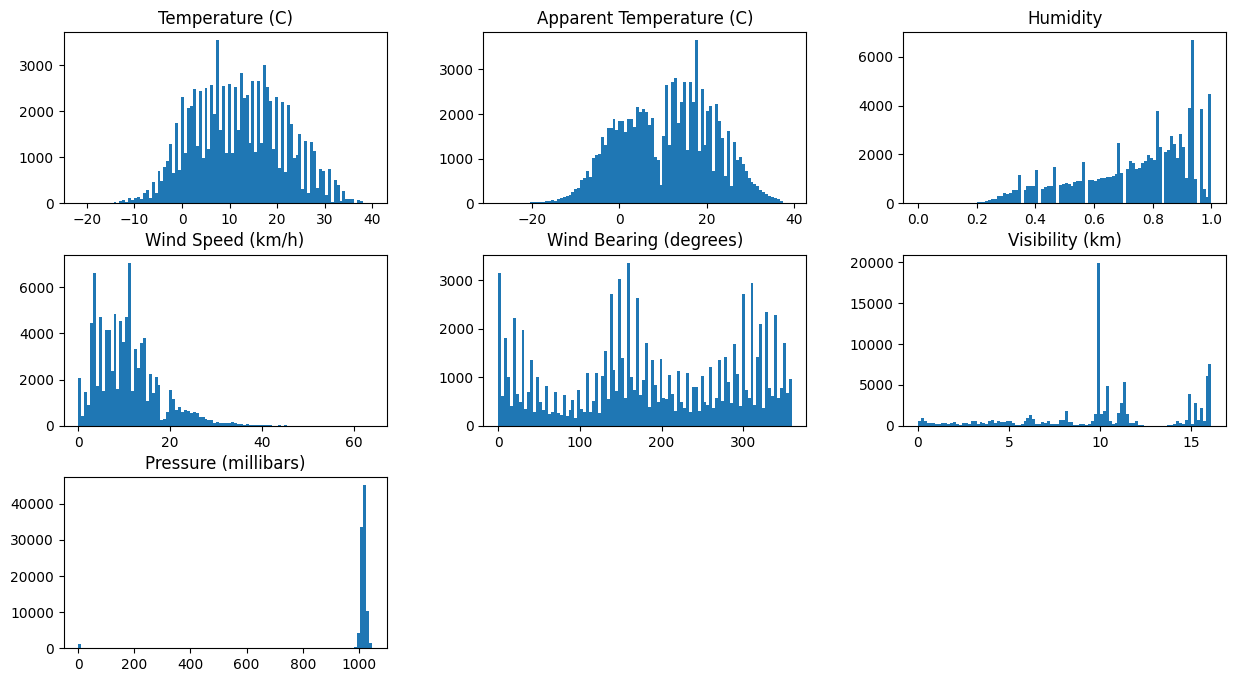

In [50]:

df.hist(
        grid=False,
        legend=False,
        figsize=(15, 8),
        bins=100,
        orientation='vertical'
)

<AxesSubplot: >

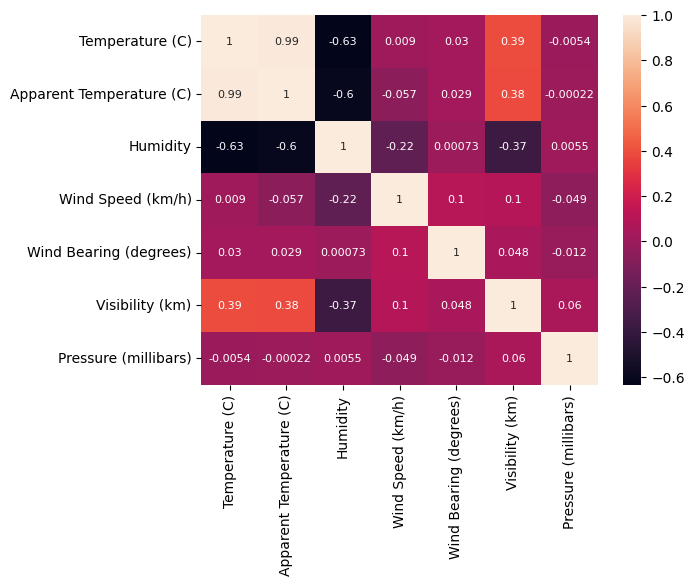

In [27]:
sns.heatmap(weather.corr(),annot=True,annot_kws={"size":8})